Imports

In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from collections import Counter
import re


Load Dataset

In [34]:


os.chdir('C:\\Users\\harri\\OneDrive\\Documents\\fake-news-detector')
# os.listdir()
# os.getcwd()
df_fake = pd.read_csv('data/raw/Fake.csv')
df_real = pd.read_csv('data/raw/True.csv')

df_fake['label'] = 0   # 0 = Fake
df_real['label'] = 1   # 1 = Real

df = pd.concat([df_fake, df_real], axis=0).reset_index(drop=True)
df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Inspect Data Structure

In [17]:
df.info()
df.describe()
df.isnull().sum()
df.nunique()
df['label'].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


label
0    0.522985
1    0.477015
Name: proportion, dtype: float64

Class Distribution (Fake vs Real)

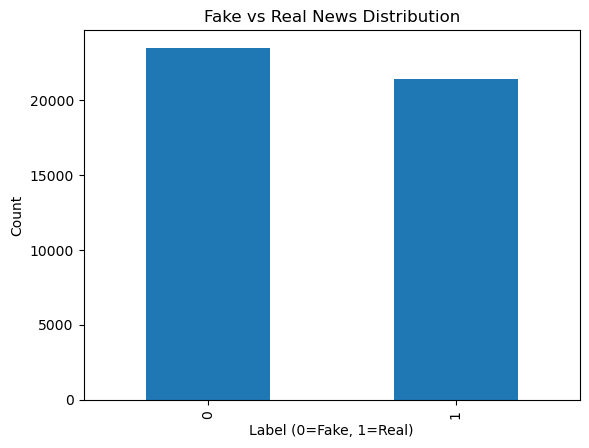

In [19]:

df['label'].value_counts().plot(kind='bar')
plt.title('Fake vs Real News Distribution')
plt.xlabel('Label (0=Fake, 1=Real)')
plt.ylabel('Count')
plt.show()


Text Length Analysis

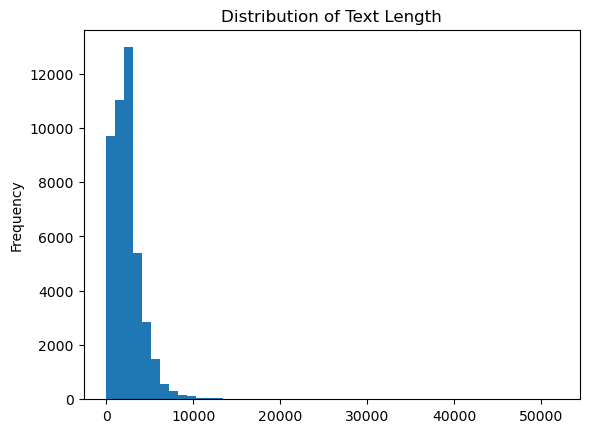

label
0    2547.396235
1    2383.278517
Name: text_length, dtype: float64

In [20]:
df['text_length'] = df['text'].apply(len)
df['text_length'].plot(kind='hist', bins=50)
plt.title('Distribution of Text Length')
plt.show()

df.groupby('label')['text_length'].mean()


Most Frequent Words (Optional Quick Check)

In [22]:
def get_top_words(text, n=20):
    words = re.findall(r'\w+', text.lower())
    return Counter(words).most_common(n)

fake_words = get_top_words(' '.join(df[df['label']==0]['text']), 20)
real_words = get_top_words(' '.join(df[df['label']==1]['text']), 20)

fake_words[:15], real_words[:15]


([('the', 543551),
  ('to', 290819),
  ('of', 236640),
  ('and', 226971),
  ('a', 214783),
  ('in', 171163),
  ('that', 151662),
  ('s', 141155),
  ('is', 111234),
  ('for', 93480),
  ('on', 83591),
  ('it', 83380),
  ('trump', 79300),
  ('he', 78997),
  ('was', 67857)],
 [('the', 482468),
  ('to', 245734),
  ('of', 205275),
  ('a', 198580),
  ('and', 182081),
  ('in', 181652),
  ('s', 141421),
  ('on', 108594),
  ('said', 99062),
  ('that', 88237),
  ('for', 79895),
  ('is', 55494),
  ('trump', 54700),
  ('with', 54504),
  ('he', 54370)])

Detect Duplicate or Suspicious Samples

In [24]:
df[df.duplicated('text')].head()


,title,text,subject,date,label,text_length
9114,WHY THIS BLUE-COLLAR DEMOCRAT STRONGHOLD Count...,AP News The regulars amble in before dawn and...,politics,"Dec 27, 2017",0,8241
9738,LEFTIST STORE OWNER Makes Video Asking Libs To...,Things didn t go as well as Nicholle had hoped...,politics,"Oct 6, 2017",0,2792
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017",0,1933
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",0,1
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",0,1
